# 최근접 이웃 회귀의 한계
### 가까운 이웃을 선정하고 이웃들의 평균값으로 예측을 하기때문에 샘플범위 밖의 값을 예측하기 힘들다. -> 선형회귀로 극복

In [18]:
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [19]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [20]:
from sklearn.neighbors import KNeighborsRegressor #최근접 이웃 회귀

knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target)
print(knr.predict([[50]])) #50cm 농어 예측
print(knr.predict([[100]]))  #100cm 농어 예측
#인접한것 3개의 평균으로 예측함으로 트레이닝에 넣은 값보다 큰 50cm와 100cm가 같아짐.

[1033.33333333]
[1033.33333333]


In [21]:
from sklearn.linear_model import LinearRegression   #선형회귀

lr = LinearRegression()
lr.fit(train_input, train_target)
print(lr.predict([[50]]))
print(lr.coef_, lr.intercept_) #학습한 직선의 기울기와 절편

[1241.83860323]
[39.01714496] -709.018644953547


In [22]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Apple SD Gothic Neo'
plt.rcParams['font.size'] = 14

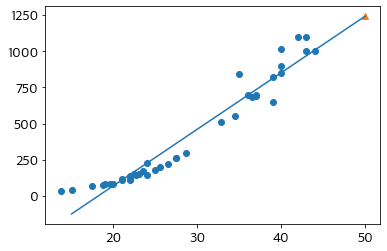

In [23]:
plt.scatter(train_input, train_target)
plt.plot([15,50],[15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])   #학습한 직선
plt.scatter(50, lr.predict([[50]]), marker='^')
plt.show()

In [24]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))  #결정계수 값이 낮다
print(lr.predict([[5]]))#길이가 작으면 음수가 나온다

0.9398463339976041
0.8247503123313562
[-513.93292014]


# 다항 회귀
### 결정계수가 낮고 무게가 음수가 나올수 있는 문제를 해결하기 위해 다항 회귀 사용.

In [25]:
#다항 회귀를 위한 제곱항
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input**2, test_input))

In [26]:
#제곱항을 넣어 학습
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]]))  #길이 50짜리 농어의 무게 예측
print(lr.coef_, lr.intercept_)   #제곱항의 계수, 절편.(제곱항이라 계수 2개)

[1573.98423528]
[  1.01433211 -21.55792498] 116.05021078278293


<function matplotlib.pyplot.show(close=None, block=None)>

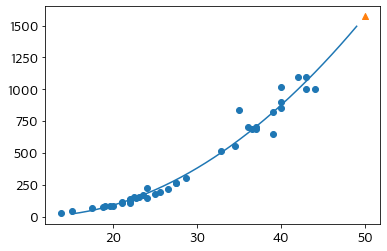

In [27]:
coef = lr.coef_
point = np.arange(15,50)
plt.scatter(train_input, train_target)
plt.plot(point, coef[0]*point**2 + coef[1]*point + lr.intercept_)

plt.scatter([50], lr.predict([[50**2, 50]]), marker='^')
plt.show

In [28]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))   #과소 적합 상태

0.9706807451768623
0.9775935108325122
